/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
    support          itemsets
0  0.020267         (almonds)
1  0.033200         (avocado)
2  0.010800  (barbecue sauce)
3  0.014267       (black tea)
4  0.011467      (body spray)

Association Rules:
       antecedents      consequents  antecedent support  consequent support  \
0  (mineral water)        (avocado)            0.238267            0.033200   
1        (avocado)  (mineral water)            0.033200            0.238267   
2        (burgers)           (cake)            0.087200            0.081067   
3           (cake)        (burgers)            0.081067            0.087200   
4      (chocolate)        (burgers)            0.163867            0.087200   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.011467    0.048125  1.449559  0.003556    1.015680       0.407144  
1  0.011467    0.345382  1.449559  0.003556    1.163629       0.320785  
2  0.011467    0.131498  1.622103  0.004398    1.058068       0.420154  
3  0.011467   

<Figure size 1000x600 with 0 Axes>

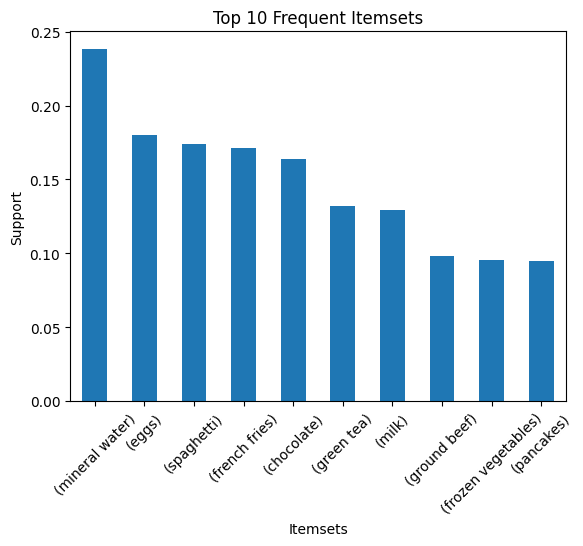

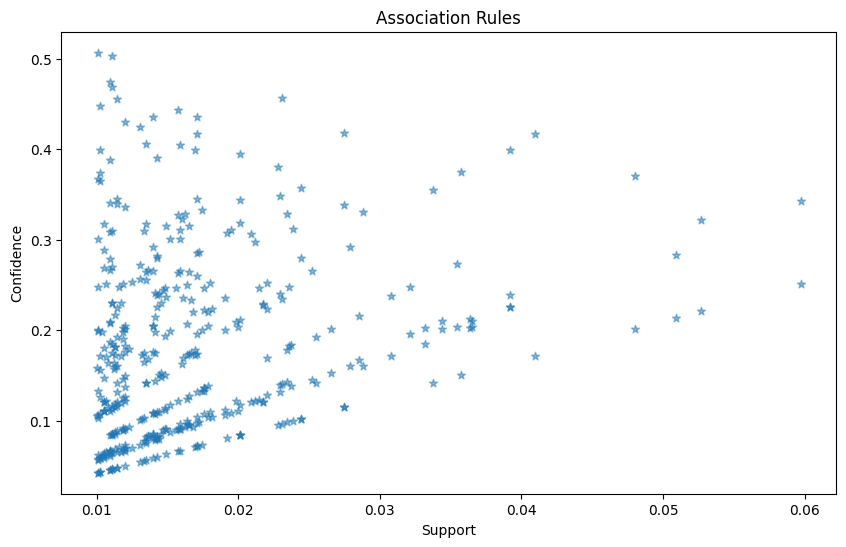


Rules with highest confidence:
                   antecedents      consequents  antecedent support  \
345        (ground beef, eggs)  (mineral water)            0.020000   
378        (ground beef, milk)  (mineral water)            0.022000   
320   (ground beef, chocolate)  (mineral water)            0.023067   
366  (milk, frozen vegetables)  (mineral water)            0.023600   
274                     (soup)  (mineral water)            0.050533   

     consequent support   support  confidence      lift  leverage  conviction  \
345            0.238267  0.010133    0.506667  2.126469  0.005368    1.544054   
378            0.238267  0.011067    0.503030  2.111207  0.005825    1.532756   
320            0.238267  0.010933    0.473988  1.989319  0.005437    1.448130   
366            0.238267  0.011067    0.468927  1.968075  0.005444    1.434328   
274            0.238267  0.023067    0.456464  1.915771  0.011026    1.401441   

     zhangs_metric  antecedents_len  consequents_len  

In [6]:
# Install the necessary libraries
!pip install mlxtend matplotlib

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'store_data.csv'
data = pd.read_csv('store_data.csv')
data.head()

# Preprocess the data
transactions = data.values.tolist()
transactions = [[item for item in transaction if not pd.isna(item)] for transaction in transactions]

# Convert the transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the results
print("Frequent Itemsets:")
print(frequent_itemsets.head())
print("\nAssociation Rules:")
print(rules.head())

# Visualize the top 10 frequent itemsets
plt.figure(figsize=(10, 6))
frequent_itemsets.sort_values(by='support', ascending=False).head(10).plot(kind='bar', x='itemsets', y='support', legend=False)
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.show()

# Visualize the association rules using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, marker='*')
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Evaluate the results
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequents_len'] = rules['consequents'].apply(lambda x: len(x))

print("\nRules with highest confidence:")
print(rules.sort_values(by='confidence', ascending=False).head())

print("\nRules with highest lift:")
print(rules.sort_values(by='lift', ascending=False).head())
